# Good Bill Hunting:
NLP Capstone Project

# Goal:
Construct a ML NLP model that predicts the political party of a congressional bill using the text from a bill.

Find any key language or words that would determine the political party of a congressional bill.

Deliver a report that explains what steps were taken, why and what the outcome was.

Make recommendations on what works or doesn't work in predicting the political party of a congressional bill.

# Imports

In [1]:
# standard DS imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# NLP imports
from bs4 import BeautifulSoup
import requests

# custom imports
from env import api_key
import json
from acquire import *
from prepare import *
from explore import *

# filter out any noisy warning flags
import warnings
warnings.filterwarnings('ignore')

# Acquire
- Data acquired from api.govinfo.gov/
- It contained 26,533 rows and 3 columns before cleaning.
- Each row represents a Congressional Bill.
- Each column represents the sponsor, political party, and text of the bill.

In [2]:
# Acquire step
df = pd.read_csv('master_df.csv')

# Prepare:
- Use regex to clean our bill text.
- Lemmatize the cleaned bill text.
- Eliminate the sponsor of the bill.
- Split data into Train, Validate, Test

In [3]:
# creating a lemmatized column and cleaning the df
df = prepare_bills_for_processing(df)

In [4]:
# splitting the data
train, X_train, y_train, X_val, y_val, X_test, y_test = split_data(df, 'party')

# Data Dictionary

| Feature | Definition |
|:--------|:-----------|
|congressional bill| legislative proposals from the House of Representatives and Senate within the United States Congress. More info: https://www.govinfo.gov/help/bills#:~:text=A%20bill%20is%20a%20legislative,(first%20and%20second%20sessions). |
|political party| Made up of individuals who organize to win elections, operate government, and influence public policy. The Democratic and Republican parties are currently the primary parties in Congress. More info: https://www.senate.gov/reference/reference_index_subjects/Political_Parties_vrd.html |
|sponsor| Patron, usually a legislator, who presents a bill or resolution to a legislature for consideration. |
|initial cosponsor or original cosponsor| Senator or representative who was listed as a cosponsor at the time of a bill's introduction|

# A brief look at the data

In [5]:
# Looking at the cleaned up columns
train.head()

,sponsor,party,bill_text,lem,model
25840,"Frelinghuysen, Rodney P.",R,\n\n\n \n To suspend temporarily the duty...,"[suspend, temporarily, duty, 3amino12propanedi...",suspend temporarily duty 3amino12propanediol e...
24423,"Foxx, Virginia",R,\n\n\n \n Of inquiry requesting the President...,"[inquiry, requesting, president, directing, se...",inquiry requesting president directing secreta...
16270,"Scott, Rick",R,\n\n\n \n To allow National Flood Insurance Pr...,"[allow, national, flood, insurance, program, p...",allow national flood insurance program policyh...
21136,"Hickenlooper, John W.",D,\n\n\n \n To provide better access to retireme...,"[provide, better, access, retirement, plan, sm...",provide better access retirement plan small bu...
11697,"Dingell, Debbie",D,\n\n\n \n To amend the Energy Policy and C...,"[amend, energy, policy, conservation, act, mod...",amend energy policy conservation act modify de...


# Explore
Questions asked:

1) Are there any words unique to a specific political party in determing Congressional Bills?

2) What are the top focus areas for each political party and are there any bi-partisan areas or Congressional Bills?

3) Are there any unique or interesting words or group of words that can determine the political party of a sponsor?  

In [6]:
# creating word_freq df
word_freq = word_freq_new_df(train, clean_text)
word_freq.head()

,bills,demo,repub,ind
procedure,9938,7305,2613,20
issue,9880,7581,2284,14
month,9869,7418,2379,71
total,9839,7506,2281,45
unit,9830,7666,2109,54


# 1) Are there any words unique to a specific political party in determing Congressional Bills?

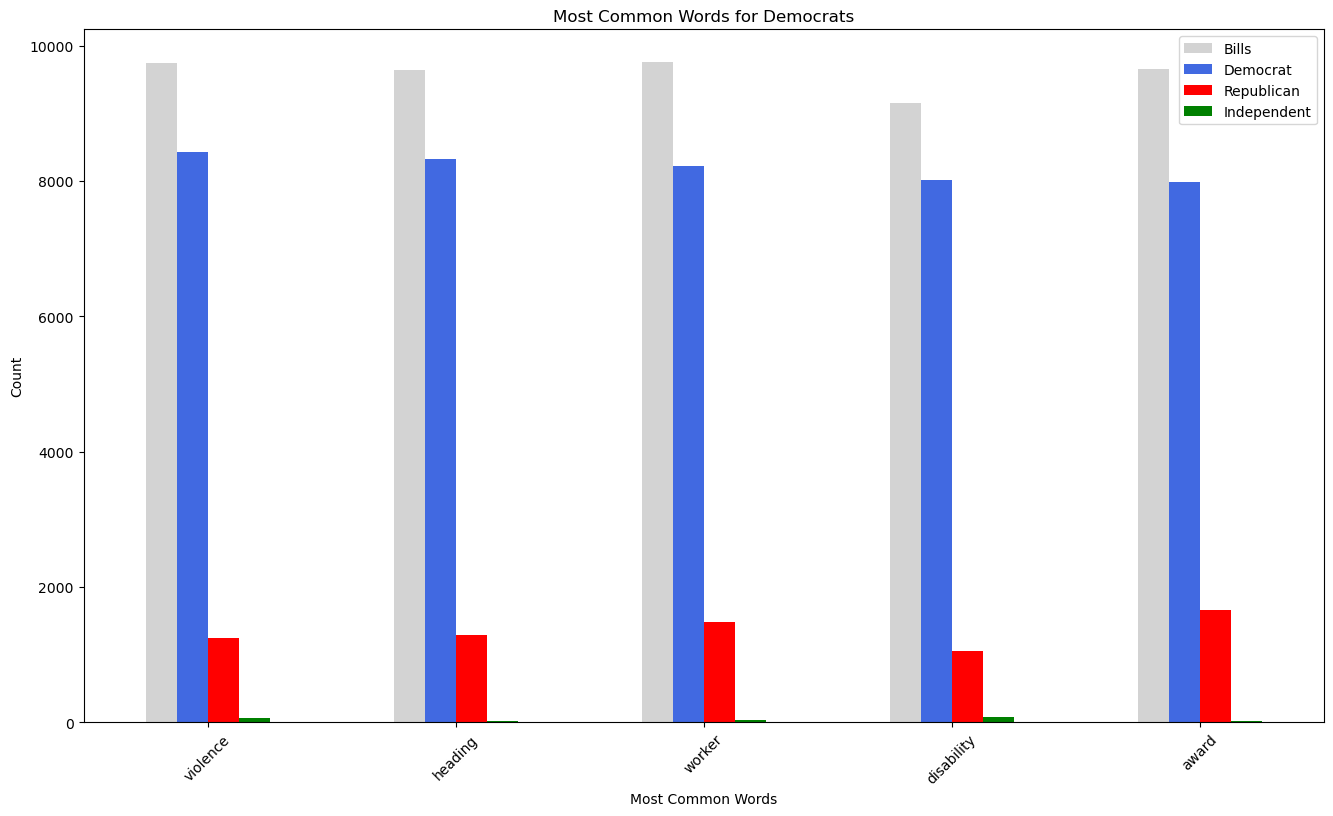

In [7]:
# visualization showing the most common words for democrats
democrat = demo_vis(word_freq)

- Democrat top words = violence, heading, worker, disability, award

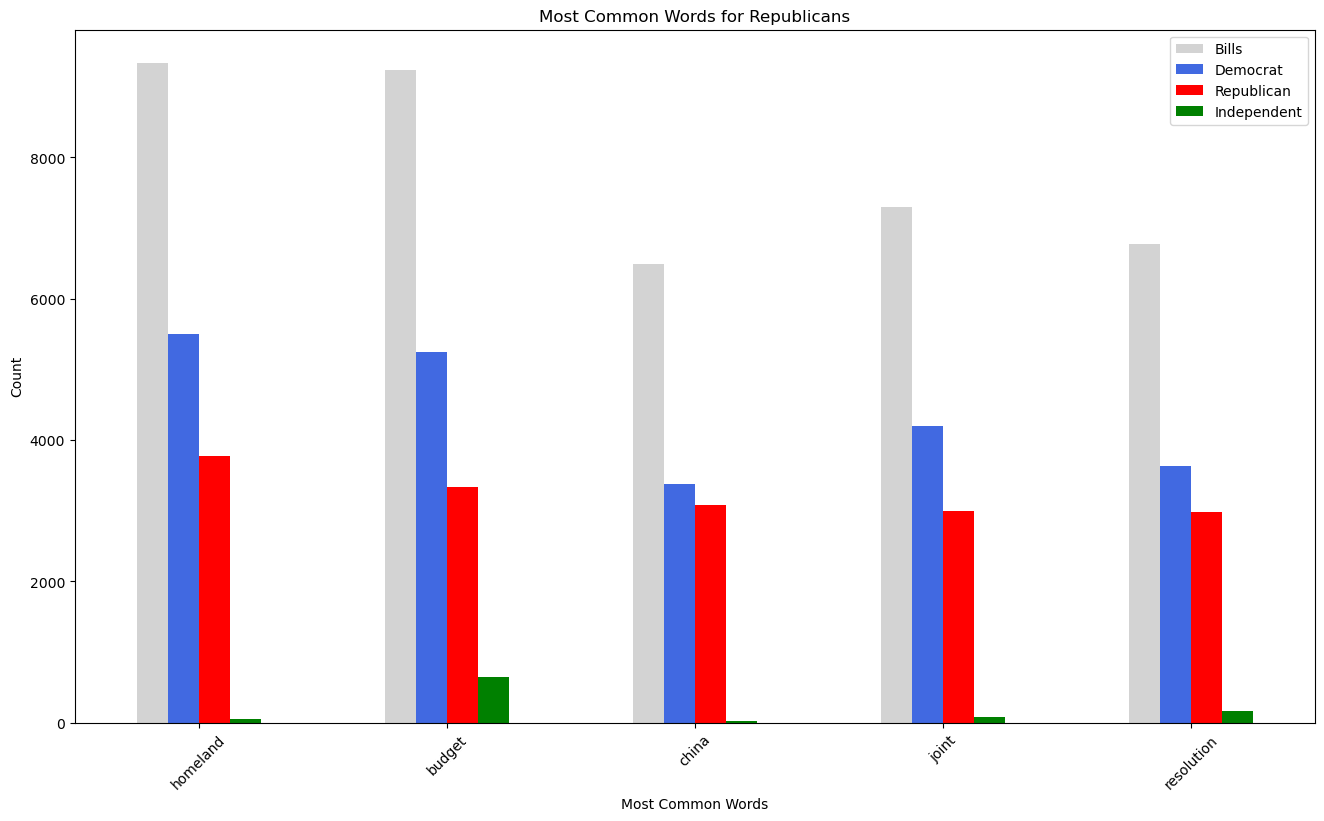

In [8]:
# visualization showing the most common words for republicans
republican = repub_vis(word_freq)

- Republican top words = homeland, budget, china, joint, resolution

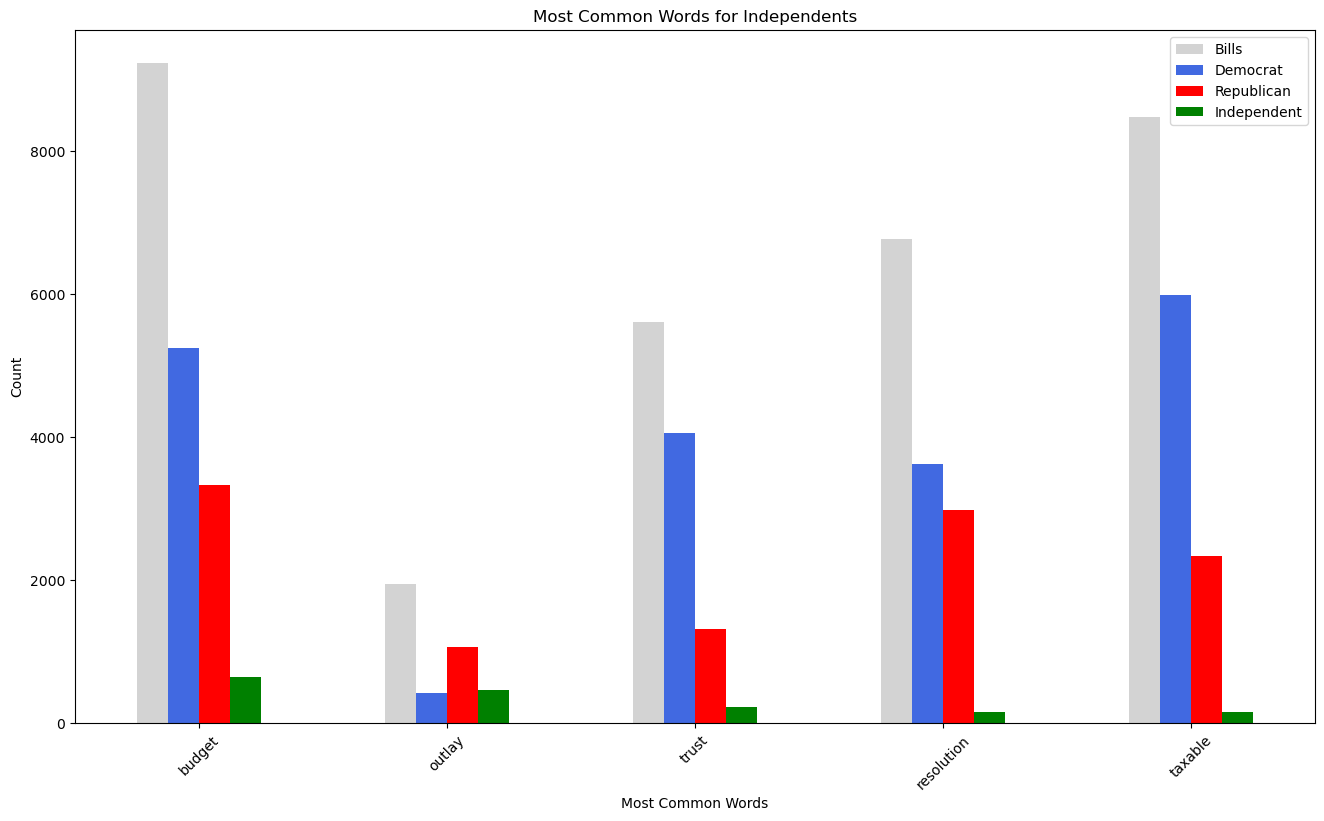

In [9]:
# visualization showing the most common words for independets
independent = ind_vis(word_freq)

- Independent top words = budget, outlay, trust, resolution, taxable


### Takeaways: ### 

- Budget appears as a top word for both republican and independent.
- Most if not all of the top words for independents appear to be related to economic subjects.
- China is a key concern for republicans.
- The overall bills appear to be related to the bill process versus any specific area.
- The top five words for each political party and the overall words for bills are mostly uniformly distributed.


# 2) What are the top focus areas for each political party and are there any bi-partisan areas or Congressional Bills?

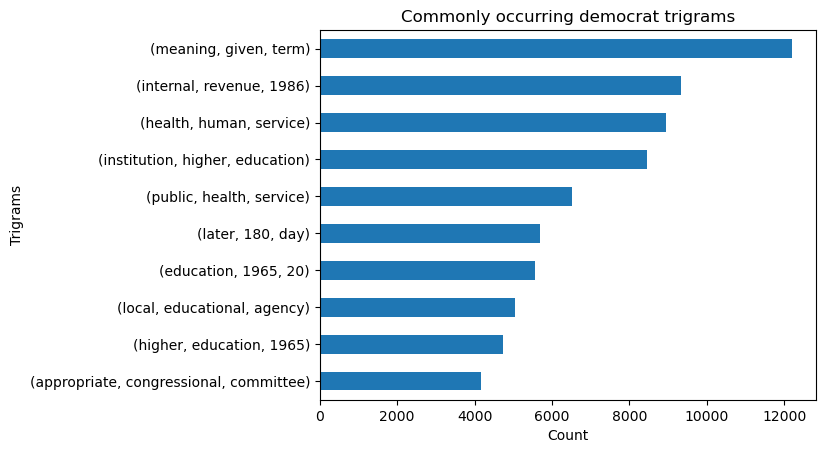

In [10]:
# visualization showing the most common trigrams for democrats
demo_trigrams_bar = demo_trigrams_vis(df)

- Democrat top trigrams = (meaning, given, term), (internal, revenue, 1986), (health, human, service)

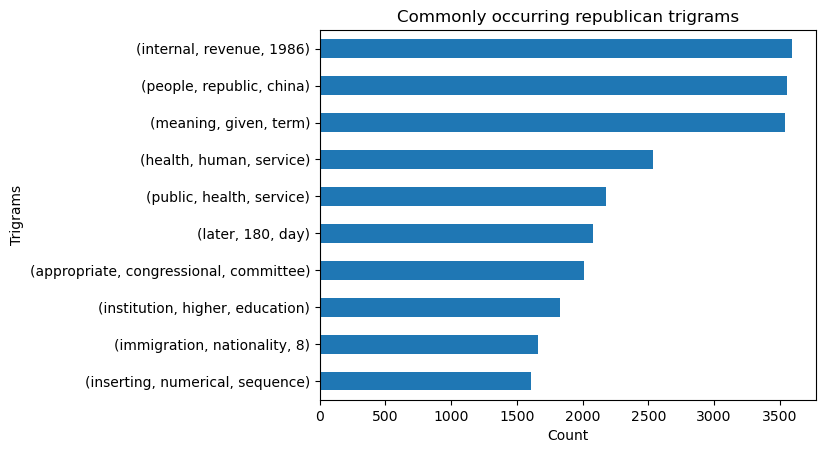

In [11]:
# visualization showing the most common trigrams for democrats
repub_trigrams_bar = repub_trigrams_vis(df)

- Republican = (internal, revenue, 1986), (people, republic, china), (meaning, given, term)

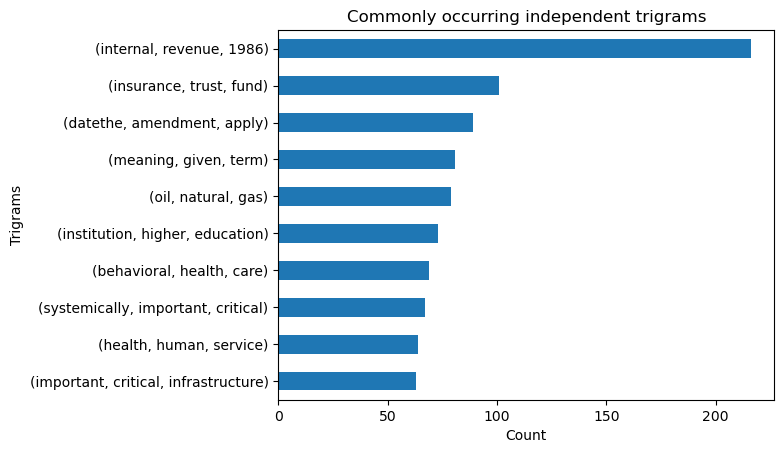

In [12]:
# visualization showing the most common trigrams for independents
ind_trigrams_bar = ind_trigrams_vis(df)

- Independent = (internal, revenue, 1986), (insurance, trust, fund), (datethe, amendment, apply)


### Takeaways: ###

- The internal revenue act of 1986 is either a major concern for all parties or an extremely large bill that is overwhelming the other bills.
- Term limits are another top area for both republicans and democrats.
- Health care is also a major area for democrats and in the top five for republicans.
- China appears again in trigrams for republicans.
- Independent trigrams once again lean toward economic subjects.
- After IRS 1986 there is a significant drop off for independent.
- After the top three trigrams for republicans there is a drop off for the next trigram concerning health care.
- The top trigrams for democrats are normally distributed, with the biggest drop off occurring between the top trigram and the next three top trigrams.

# 3) Are there any unique or interesting words or group of words that can determine the political party of a sponsor?  

In [ ]:
# visualization showing someting interesting
filler_variable = another_function(df)

- Holder for markdown comment

### Takeaways: ###

- Put takeaways here...

# Exploration Summary
- Each political party had a focus area of concentration: for democrats the main are appears to be healthcare and higher education, republicans are focused on homeland security and China, and independents tend to lean toward economic concerns.
- The large amount of bills by democrats versus the other political parties may be obscuring the data from the other parties.
- Common areas of concern appear to be health care and term limits, at least for democrats and republicans.
- Although specific words may not necessarilly determine if a bill is a certain political party, there are some words that are associated with particualar political interests that could determine if a bill is from a particular political party.

# Modeling
- The _______________ will be the baseline we use for this project.
- We will be evaluating models developed using (input number of models here) different model types and various hyperparameter configurations.
- Models will be evaluated on train and validate data.
- The model that performs the best will then be evaluated on test data.
*The _________ model produced the best results.*

In [ ]:
# Start with the baseline
baseline = prepare.baseline(y_train, y_validate)
baseline

# Linear Regression Model

In [ ]:
# calling the function for the linear regression model
lr_model = prepare.linear_reg_model(X_train, y_train, y_validate, X_validate)
lr_model

- Linear regression model performed better than the baseline on train and validate

# Tweedie Model

In [ ]:
# Calling the function for the tweedie model
tm_model = prepare.tweedie_model(X_train, y_train, y_validate, X_validate)
tm_model

- Tweedie model performed better than the baseline on train and validate

# Polynomial Model

In [ ]:
# Calling the function for the polynomial model
pf_model = prepare.poly_model(X_train, y_train, y_validate, X_validate)
pf_model

- Polynomial model performed better than the baseline on train and validate

In [ ]:
# Visualization comparing the top three models
model_comp_hist = prepare.model_compare_visual(y_train, y_validate, X_train, X_validate)

- Tweedie overreacts to noise, but polynomial and linear regression mirror the actual, with *the linear regression model an almost exact match.*


# Comparing Models
- The Linear Regression, Tweedie, and Polynomial models all performed better than the baseline.
- The Linear Regression model performed the best on train and validate of all the models.
- We have chosen to move forward with the Linear Regression model because it performed better on the validate data.

# Linear Regression on Test

In [ ]:
# Calling the function for the Linear Regression test model
lrm_test_model = prepare.lr_test_model(X_test, y_test, X_train, y_train)
lrm_test_model

# Modeling Summary
- All three of the models performed better than the baseline on train and validate.
- A linear regression model was selected as the final model and had a better error of prediction than the baseline.

# Conclusions

## Exploration
- Most imortant takeaway....

- Second most important takeaway...

- Third most imortant takeaway...

## Modeling
- ***The final model outperformed the baseline. Possible reasons include:***

- The high level of correlation betwee the features and the target variable possibly created a model with a high rate of accuracy.


# Recommendations
- Recommendation one...
- Recommendation two...
- Recommendation three...

# Next Steps
- Next step one...
- Next step two...
- Next step three...